<h3>Importing necessary Libraries

In [ ]:
pip install emoji

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.preprocessing import LabelEncoder
import re
import emoji
import string
from nltk.stem import WordNetLemmatizer

In [ ]:
df = pd.read_csv('/content/twitter_training.csv')

Change the dataset column names.

In [ ]:
df.columns = ['tweet_id', 'Entity', 'Sentiment','Text']


In [ ]:
df.head()

,tweet_id,Entity,Sentiment,Text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


Doing necessary preprocessing

In [ ]:
df.drop_duplicates(inplace=True, keep='first')

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.shape

(71655, 4)

In [ ]:
new_df = df[['Sentiment','Text']]

In [ ]:
encoder = LabelEncoder()
new_df['Sentiment'] = encoder.fit_transform(new_df['Sentiment'])
new_df['Sentiment'].head()

/tmp/ipython-input-3321375937.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Sentiment'] = encoder.fit_transform(new_df['Sentiment'])


,Sentiment
0,3
1,3
2,3
3,3
4,3


In [ ]:
new_df['Sentiment'].value_counts().values

array([21698, 19712, 17708, 12537])

<h3>EDA

/tmp/ipython-input-516605598.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=new_df, palette='viridis')


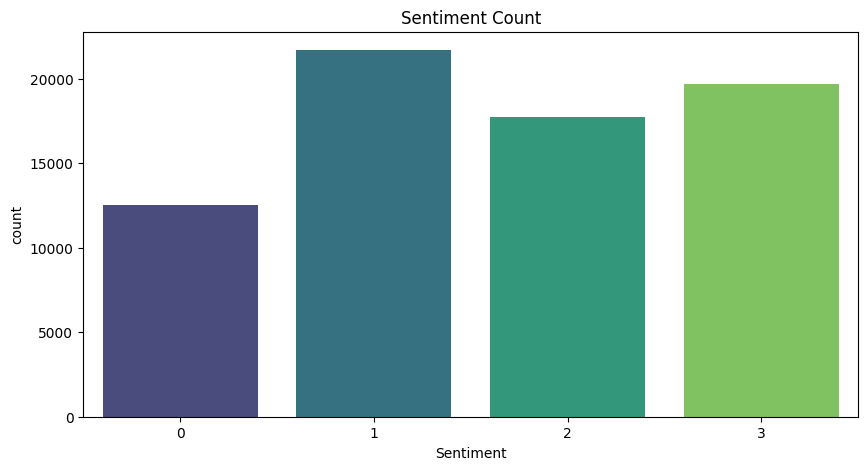

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Sentiment', data=new_df, palette='viridis')
plt.title('Sentiment Count')
plt.show()

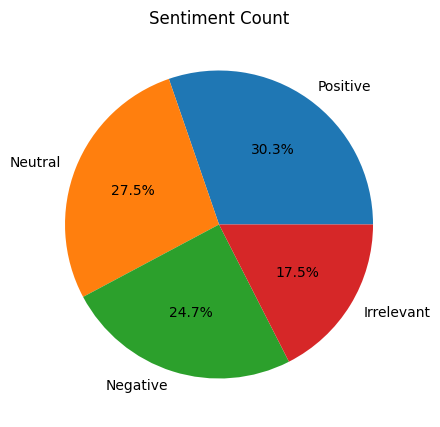

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(new_df['Sentiment'].value_counts(),labels = ['Positive', 'Neutral', 'Negative', 'Irrelevant'], autopct='%1.1f%%')
plt.title('Sentiment Count')
plt.show()

<h3>NLP

Download dependencies



In [ ]:
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
stop_words = stopwords.words('english')

In [ ]:
print(stop_words)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

Turn to Lowercase

In [ ]:
new_df['Text'] = df['Text'].str.lower()

/tmp/ipython-input-1152799509.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Text'] = df['Text'].str.lower()


Remove Html tags

In [ ]:
def remove_html_tags(text):
  pattern = re.compile('<.*?>')
  return pattern.sub(r'',text)

In [ ]:
new_df['Text'] = new_df['Text'].apply(remove_html_tags)

/tmp/ipython-input-1699208466.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Text'] = new_df['Text'].apply(remove_html_tags)


Remove Url from texts

In [ ]:
def remove_url(text):
  pattern = re.compile(r'https?://\S+|www\.\S+')
  return pattern.sub(r'',text)

In [ ]:
new_df['Text'] = new_df['Text'].apply(remove_url)

/tmp/ipython-input-524388586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Text'] = new_df['Text'].apply(remove_url)


Remove Stopwords

In [ ]:
def remove_stopwords(text):
  word_tokens = word_tokenize(text)
  filtered_text = [x for x in word_tokens if x not in stop_words]
  return ' '.join(filtered_text)

In [ ]:
new_df['Text'] = new_df['Text'].apply(remove_stopwords)

/tmp/ipython-input-3363058929.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Text'] = new_df['Text'].apply(remove_stopwords)


In [ ]:
punctuation = """!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""

<>:1: SyntaxWarning: invalid escape sequence '\]'
<>:1: SyntaxWarning: invalid escape sequence '\]'
/tmp/ipython-input-2960687446.py:1: SyntaxWarning: invalid escape sequence '\]'
  punctuation = """!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""


Remove Punctuations

In [ ]:
def remove_punctuations(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

In [ ]:
new_df['Text'] = new_df['Text'].apply(remove_punctuations)

/tmp/ipython-input-2712776193.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Text'] = new_df['Text'].apply(remove_punctuations)


In [ ]:
new_df['Text'][1223]

'finally got hands borderlands 3  googlestadia weekend thanks free weekend pro subscribers  naturally  compare others  shame geforce could nt part  2k  borderlands feel free bring back youtube1oblmlnsg4'

Convert Emoji to word description

In [ ]:
new_df['Text'] = new_df['Text'].apply(emoji.demojize)

/tmp/ipython-input-1234959703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Text'] = new_df['Text'].apply(emoji.demojize)


Chat word removal

In [ ]:
chat_words = {
    "A3": "Anytime, Anywhere, Anyplace",
    "ADIH": "Another Day In Hell",
    "AFK": "Away From Keyboard",
    "AFAIK": "As Far As I Know",
    "ASAP": "As Soon As Possible",
    "ASL": "Age, Sex, Location",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "BAE": "Before Anyone Else",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRUH": "Bro",
    "BRT": "Be Right There",
    "BSAAW": "Big Smile And A Wink",
    "BTW": "By The Way",
    "BWL": "Bursting With Laughter",
    "CSL": "Can’t Stop Laughing",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "DM": "Direct Message",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FIMH": "Forever In My Heart",
    "FOMO": "Fear Of Missing Out",
    "FR": "For Real",
    "FWIW": "For What It's Worth",
    "FYP": "For You Page",
    "FYI": "For Your Information",
    "G9": "Genius",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GMTA": "Great Minds Think Alike",
    "GN": "Good Night",
    "GOAT": "Greatest Of All Time",
    "GR8": "Great!",
    "HBD": "Happy Birthday",
    "IC": "I See",
    "ICQ": "I Seek You",
    "IDC": "I Don’t Care",
    "IDK": "I Don't Know",
    "IFYP": "I Feel Your Pain",
    "ILU": "I Love You",
    "ILY": "I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMU": "I Miss You",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "IYKYK": "If You Know, You Know",
    "JK": "Just Kidding",
    "KISS": "Keep It Simple, Stupid",
    "L": "Loss",
    "L8R": "Later",
    "LDR": "Long Distance Relationship",
    "LMK": "Let Me Know",
    "LMAO": "Laughing My A** Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "M8": "Mate",
    "MFW": "My Face When",
    "MID": "Mediocre",
    "MRW": "My Reaction When",
    "MTE": "My Thoughts Exactly",
    "NVM": "Never Mind",
    "NRN": "No Reply Necessary",
    "NPC": "Non-Player Character",
    "OIC": "Oh I See",
    "OP": "Overpowered",
    "PITA": "Pain In The A**",
    "POV": "Point Of View",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A** Off",
    "RN": "Right Now",
    "SK8": "Skate",
    "STATS": "Your Sex And Age",
    "SUS": "Suspicious",
    "TBH": "To Be Honest",
    "TFW": "That Feeling When",
    "THX": "Thank You",
    "TIME": "Tears In My Eyes",
    "TLDR": "Too Long, Didn’t Read",
    "TNTL": "Trying Not To Laugh",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "W": "Win",
    "W8": "Wait...",
    "WB": "Welcome Back",
    "WTF": "What The F**k",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "WYD": "What You Doing?",
    "WYWH": "Wish You Were Here",
    "ZZZ": "Sleeping, Bored, Tired"
}

In [ ]:
def replace_chat_words(text):
    words = text.split()
    new_words = []
    for word in words:
        if word.upper() in chat_words:
            new_words.append(chat_words[word.upper()])
        else:
            new_words.append(word)
    return ' '.join(new_words)


In [ ]:
new_df['Text'] = new_df['Text'].apply(replace_chat_words)

/tmp/ipython-input-2384852540.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Text'] = new_df['Text'].apply(replace_chat_words)


Lemmatization

In [ ]:
nltk.download('averaged_perceptron_tagger_eng')


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    from nltk import pos_tag
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {
        'J': wordnet.ADJ,
        'N': wordnet.NOUN,
        'V': wordnet.VERB,
        'R': wordnet.ADV
    }
    return tag_dict.get(tag, wordnet.NOUN)

def lemmatize(text):
    words = text.split()
    filtered_text = []
    for word in words:
      pos = get_wordnet_pos(word)
      lemma = lemmatizer.lemmatize(word,pos)
      filtered_text.append(lemma)

    return ' '.join(filtered_text)


In [ ]:
new_df['Text'] = new_df['Text'].apply(lemmatize)

/tmp/ipython-input-2102070760.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Text'] = new_df['Text'].apply(lemmatize)


In [ ]:
train_df = new_df

Importing and applying necessary preprocessing on the validation dataset

In [ ]:
test_df = pd.read_csv('/content/twitter_validation (1).csv')

In [ ]:
test_df.columns = ['tweet_id', 'Entity', 'Sentiment','Text']

In [ ]:
test_df.head()

,tweet_id,Entity,Sentiment,Text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [ ]:
test_df.drop(columns = ['tweet_id','Entity'], inplace=True)

In [ ]:
test_df['Sentiment'] = encoder.fit_transform(test_df['Sentiment'])
test_df['Sentiment'].head()

,Sentiment
0,2
1,1
2,1
3,2
4,1


In [ ]:
test_df['Text'] = test_df['Text'].str.lower()
test_df['Text'] = test_df['Text'].apply(remove_url)
test_df['Text'] = test_df['Text'].apply(remove_stopwords)
test_df['Text'] = test_df['Text'].apply(remove_punctuations)
test_df['Text'] = test_df['Text'].apply(emoji.demojize)
test_df['Text'] = test_df['Text'].apply(replace_chat_words)
test_df['Text'] = test_df['Text'].apply(lemmatize)

<h3>Training

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer(max_features=15000, ngram_range = (1,2))

In [ ]:
X_train = tfidf.fit_transform(train_df['Text'])
X_test = tfidf.transform(test_df['Text'])

In [ ]:
y_train = train_df['Sentiment']
y_test = test_df['Sentiment']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

gnb = GaussianNB()
rf = RandomForestClassifier(n_estimators = 100)
et = ExtraTreesClassifier(n_estimators = 100)
mnb = MultinomialNB()

gnb.fit(X_train.toarray(),y_train)
et.fit(X_train,y_train)
rf.fit(X_train,y_train)
mnb = mnb.fit(X_train,y_train)

In [ ]:
y_pred1 = gnb.predict(X_test.toarray())
y_pred2 = et.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = mnb.predict(X_test)

Accuracy and Validation

In [ ]:
from sklearn.metrics import classification_report

print('the report for 1 is \n',classification_report(y_pred1,y_test))
print('the report for 2 is \n',classification_report(y_pred2,y_test))
print('the report for 3 is \n',classification_report(y_pred3,y_test))
print('the report for 4 is \n',classification_report(y_pred4,y_test))

the report for 1 is 
               precision    recall  f1-score   support

           0       0.96      0.45      0.61       370
           1       0.65      0.96      0.77       181
           2       0.64      0.91      0.75       201
           3       0.70      0.79      0.74       247

    accuracy                           0.72       999
   macro avg       0.74      0.78      0.72       999
weighted avg       0.78      0.72      0.70       999

the report for 2 is 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       170
           1       0.97      0.96      0.96       270
           2       0.95      0.98      0.96       275
           3       0.97      0.95      0.96       284

    accuracy                           0.96       999
   macro avg       0.96      0.96      0.96       999
weighted avg       0.96      0.96      0.96       999

the report for 3 is 
               precision    recall  f1-score   support

         

Export Model using Pickle and joblib

In [ ]:
import pickle

Tfidf = pickle.dump(tfidf,open('tfidf.pkl','wb'))
gnb = pickle.dump(et,open('et.pkl','wb'))

In [ ]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(et,open('model.pkl','wb'))

In [ ]:
from joblib import dump
dump(et, 'compressed_model.joblib', compress=3)


['compressed_model.joblib']